The CRISP-DM (Cross-Industry Standard Process for Data Mining) method will be applied here to keep track of the analysis process.

In [373]:
# to handle datasets
import numpy as np
import pandas as pd

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to change plot style
sns.set(style="darkgrid")

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")


# 1. Business Understanding

We are in the age of technology. The production of new technologies is very fast. Many programming languages and IDEs can become popular and suddenly lose their popularity. I will analyze the preferences of software developers in 2018 and 2019.

I will focus on the three question below:

* What is the most preferred IDE in 2018 and 2019?

* What is the most preferred programming language in 2018 and 2019?

* What is the most preferred IDE in 15 countries participating in the survey and what is its change over the years?

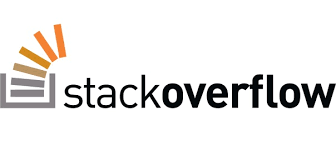

For this, we are going to use data from Stackoverflow’s 2018 and 2019 Annual Developer Survey.

# 2. Data Understanding

In [375]:
#load dataset
survey_results_public_2019 = pd.read_csv('developer_survey_2019/survey_results_public.csv')
survey_results_public_2018 = pd.read_csv('developer_survey_2018/survey_results_public.csv')

In [382]:
#see first 5 rows of the dataset survey_results_public_2019
survey_results_public_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [383]:
#see first 5 rows of the dataset survey_results_public_2018
survey_results_public_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [384]:
#see the column list of both dataset
print(survey_results_public_2019.columns.tolist())
print("----")
print(survey_results_public_2018.columns.tolist())

['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisi

In [385]:
#see the shape of both dataset
print(survey_results_public_2019.shape)
print("----")
print(survey_results_public_2018.shape)

(88883, 85)
----
(98855, 129)


In [395]:
#missing values of DevEnviron since we will use this column
print(round(100*survey_results_public_2019.isnull().sum()['DevEnviron']/survey_results_public_2019.shape[0],2),'%')

1.76 %


In [397]:
#missing values of IDE since we will use this column
print(round(100*survey_results_public_2018.isnull().sum()['IDE']/survey_results_public_2018.shape[0],2),'%')

23.73 %


# 3. Prepare Data

* We will not use all columns in our analysis so we need to select the columns and create a new dataframe
* DevEnviron, IDE and LanguageWorkedWith columns needs to be splitted 
* Year column need to be added for both dataset
* Two dataframes will be combined to create a single dataframe

In [400]:
#the functıon for spliting text in a column into multiple rows
def split_column_to_rows(df,column,sep=";"):
    '''
    split text in a column into multiple rows
    
    '''
    s = df[column].str.split(sep, expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = df.loc[i].copy()
    df2[column] = s.values
    return df2


In [404]:
IDE_2019 = survey_results_public_2019[['Country','DevEnviron']] # Country and DevEnviron columns selected for 2019 dataset
new_IDE_2019 = split_column_to_rows(IDE_2019,'DevEnviron') # split text in DevEnviron column into multiple rows

IDE_2018 = survey_results_public_2018[['Country','IDE']] # Country and IDE columns selected for 2018 dataset
new_IDE_2018 = split_column_to_rows(IDE_2018,'IDE')  # split text in IDE column into multiple rows
new_IDE_2018.rename(columns={"IDE": "DevEnviron"},inplace=True) # IDE and DevEnviron is same thing so changed name to DevEnviron

new_IDE_2019['year'] = 2019 # year column added
new_IDE_2018['year'] = 2018 # year column added
new_IDE = pd.concat([new_IDE_2018,new_IDE_2019]) # concatenation of two dataframes
new_IDE.head()

,Country,DevEnviron,year
0,Kenya,Komodo,2018
0,Kenya,Vim,2018
0,Kenya,Visual Studio Code,2018
1,United Kingdom,IPython / Jupyter,2018
1,United Kingdom,Sublime Text,2018


In [405]:
most_countries = new_IDE.groupby(['Country']).size().sort_values(ascending=False).head(15).index.tolist() # first 15 countries participating in the survey 
most_countries

['United States',
 'India',
 'Germany',
 'United Kingdom',
 'Canada',
 'France',
 'Brazil',
 'Russian Federation',
 'Australia',
 'Poland',
 'Netherlands',
 'Spain',
 'Italy',
 'Sweden',
 'Turkey']

In [406]:
LANG_2019 = survey_results_public_2019[['Country','LanguageWorkedWith']]  # Country and LanguageWorkedWith columns selected for 2019 dataset
LANG_2019['LanguageWorkedWith'] = LANG_2019['LanguageWorkedWith'].str.replace('Bash/Shell/PowerShell','Bash/Shell') # Language Bash/Shell changed to Bash/Shell/PowerShell in 2019, replaced with old form  
new_LANG_2019 = split_column_to_rows(LANG_2019,'LanguageWorkedWith')  # split text in LanguageWorkedWith column into multiple rows



LANG_2018 = survey_results_public_2018[['Country','LanguageWorkedWith']]
LANG_2018['LanguageWorkedWith'] = LANG_2018['LanguageWorkedWith'].str.replace('HTML;CSS','HTML/CSS') # while HTML CSS are two different languages in 2018,  it has become a single language in 2019
new_LANG_2018 = split_column_to_rows(LANG_2018,'LanguageWorkedWith')  # split text in LanguageWorkedWith column into multiple rows

new_LANG_2019['year'] = 2019 # year column added
new_LANG_2018['year'] = 2018 # year column added
new_LANG = pd.concat([new_LANG_2018,new_LANG_2019])
new_LANG.head()

,Country,LanguageWorkedWith,year
0,Kenya,JavaScript,2018
0,Kenya,Python,2018
0,Kenya,HTML/CSS,2018
1,United Kingdom,JavaScript,2018
1,United Kingdom,Python,2018


# 4. Answer Questions based on dataset

* ### What is the most preferred IDE in 2018 and 2019?

In [407]:
new_IDE_group = new_IDE.groupby(['year','DevEnviron']).size()
new_IDE_group = new_IDE_group.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).sort_values(ascending=False).reset_index()
new_IDE_group.rename(columns={0: "percentage"},inplace=True)
new_IDE_group.head(10)

,year,DevEnviron,percentage
0,2019,Visual Studio Code,17.546479
1,2018,Visual Studio Code,11.691380
2,2018,Visual Studio,11.508980
3,2018,Notepad++,11.457819
4,2019,Visual Studio,10.885620
5,2019,Notepad++,10.541509
6,2018,Sublime Text,9.702777
7,2019,IntelliJ,8.777397
8,2019,Vim,8.776209
9,2018,Vim,8.664878


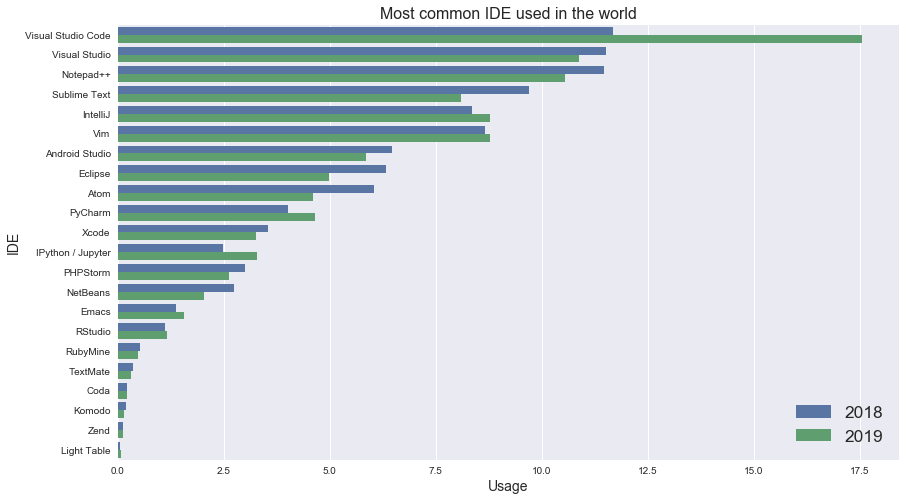

In [408]:
plt.figure(figsize=(14,8))
sns.barplot(x = new_IDE_group['percentage'],
            y =  new_IDE_group['DevEnviron'],
            hue = 'year',
            data = new_IDE_group)

plt.xlabel("Usage", fontsize = 14)
plt.ylabel("IDE", fontsize = 14)
plt.legend(fontsize='x-large')
plt.title('Most common IDE used in the world', size = 16)
plt.show()

From the result and plot, it's obvious that the most preferred IDE in both 2018 and 2019 is Visual Studio Code. While Visual Studio, Visual Studio Code and Notepad++ are in close ratios in 2018, Visual Studio Code opens the gap in 2019, keeping the first place with a big difference.

Sublime Text, Eclipse and Atom were less preferred in 2019 compared to 2018.

* ### What is the most preferred programming language in 2018 and 2019?

In [409]:
new_LANG_group = new_LANG.groupby(['year','LanguageWorkedWith']).size()
new_LANG_group = new_LANG_group.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).sort_values(ascending=False).reset_index()
new_LANG_group.rename(columns={0: "percentage"},inplace=True)
new_LANG_group.head()

,year,LanguageWorkedWith,percentage
0,2019,JavaScript,13.443434
1,2019,HTML/CSS,12.591458
2,2018,JavaScript,12.554380
3,2018,HTML/CSS,11.495823
4,2019,SQL,10.793067


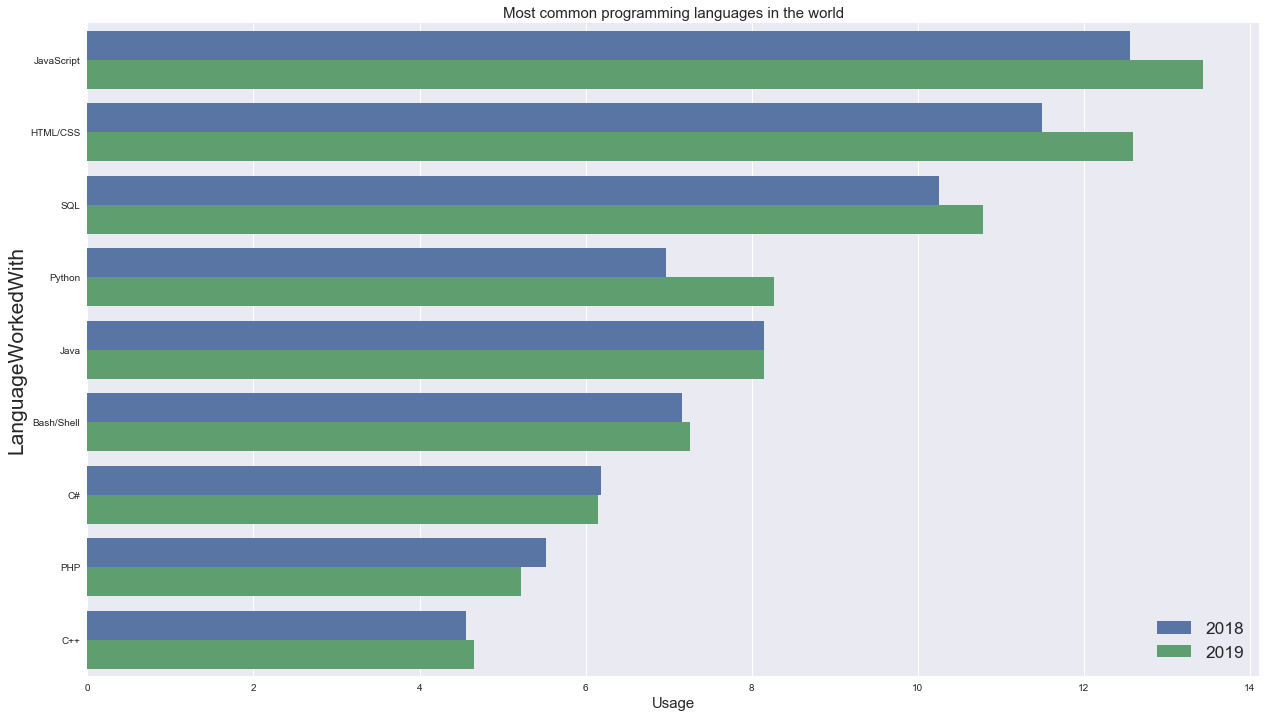

In [410]:
plt.figure(figsize=(21,12))
sns.barplot(x = new_LANG_group.head(18)['percentage'],
            y =  new_LANG_group.head(18)['LanguageWorkedWith'],
            hue = 'year',
            data = new_LANG_group.head(18))

plt.xlabel("Usage", fontsize = 15)
plt.ylabel("LanguageWorkedWith", fontsize = 21)
plt.legend(fontsize='x-large')
plt.title('Most common programming languages in the world', size = 15)
plt.show()

From the result and plot, it's obvious that the most preferred programming language in both 2018 and 2019 is Javascript. The popularity of web-based programming languages is increasing day by day. 

We see that python was preferred more in 2019 than in 2018. I think that Python programming language will increase its popularity in the coming years as it is a popular language in AI / ML.

* ### What is the most preferred IDE in the first 15 countries participating in the survey and what is its change over the years?

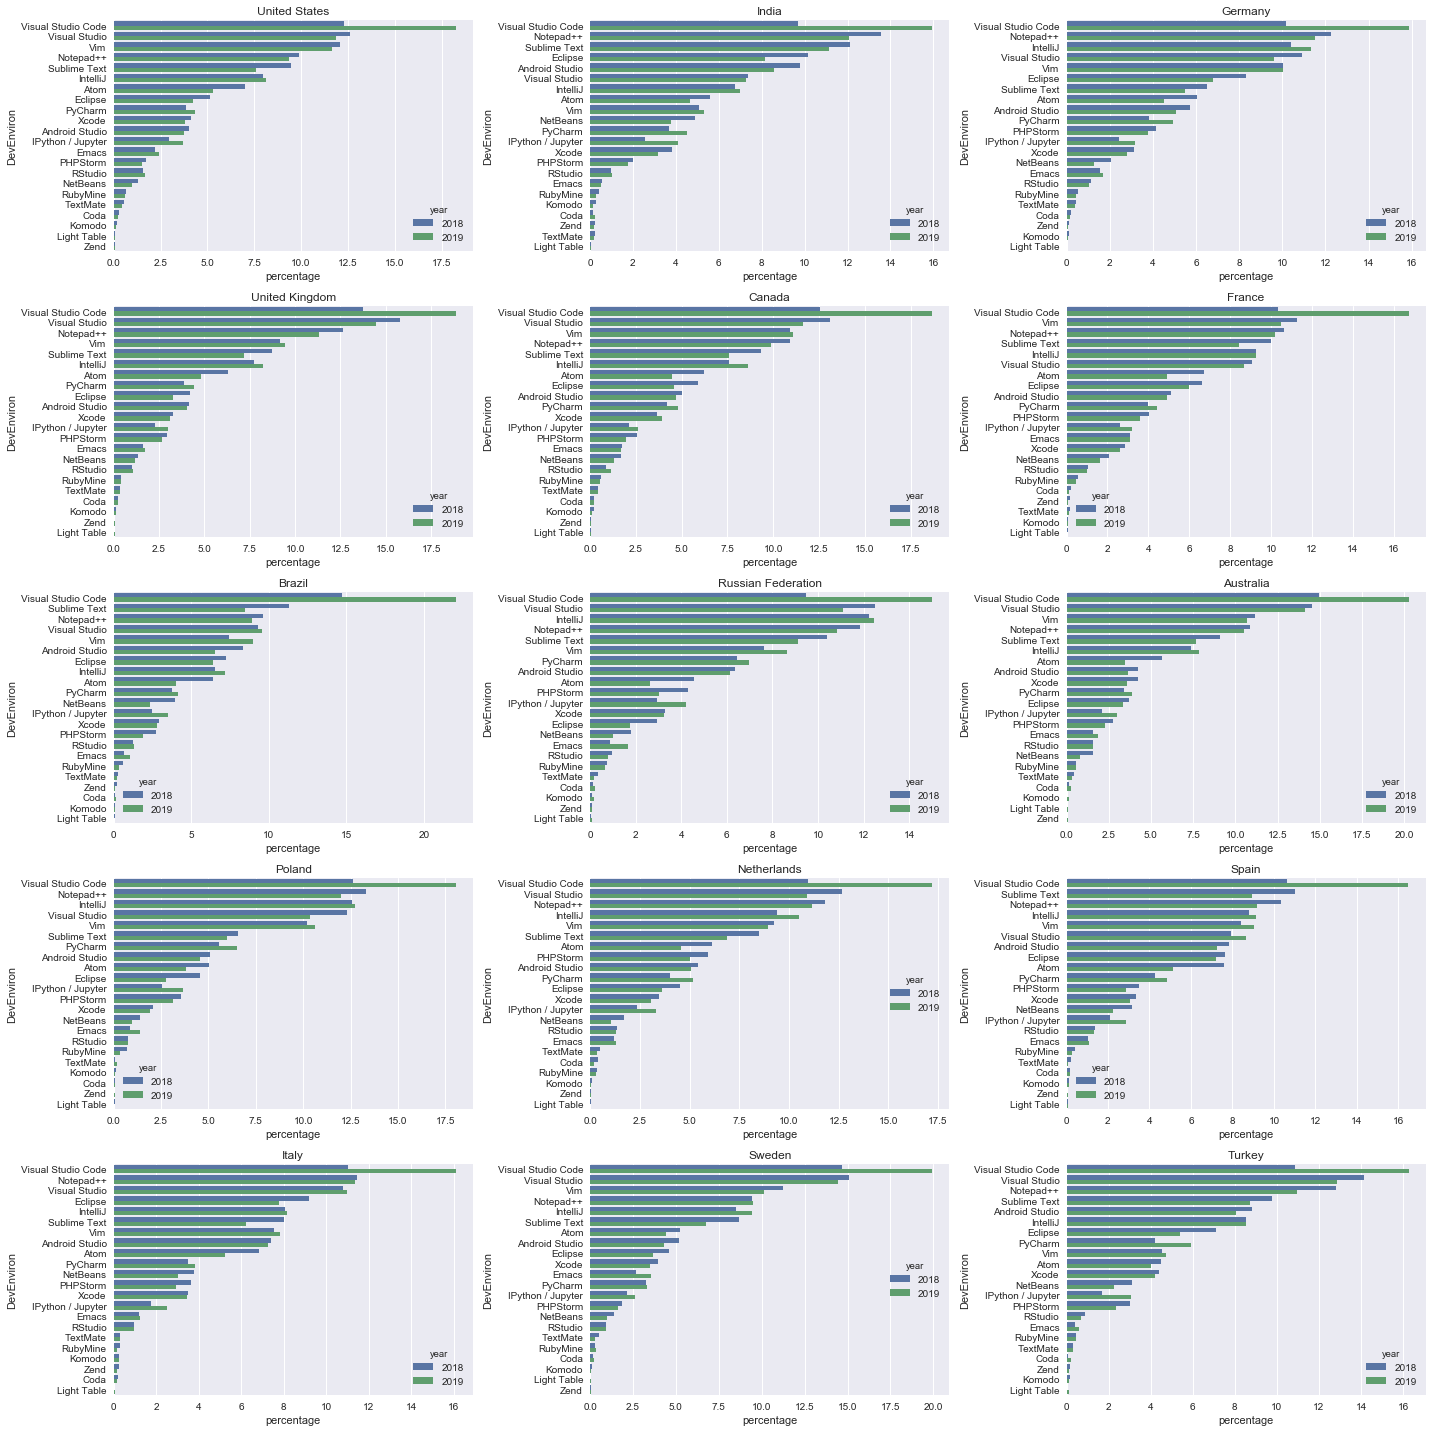

In [372]:
fig, axs = plt.subplots(5,3, figsize=(20,20), squeeze=False)
i = 0
j = 0
for country in most_countries:
    new_IDE_group_country = new_IDE[new_IDE.Country==country]
    new_IDE_group = new_IDE_group_country.groupby(['year','DevEnviron']).size()
    new_IDE_group = new_IDE_group.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).sort_values(ascending=False).reset_index()
    new_IDE_group.rename(columns={0: "percentage"},inplace=True)
    new_IDE_group.head()
    sns.barplot(x = new_IDE_group['percentage'],
                y =  new_IDE_group['DevEnviron'],
                hue = 'year',
                data = new_IDE_group,ax=axs[i][j])

    axs[i][j].set_title(country)
    j = j +1
    if j==3:
        j=0
        i=i+1

plt.tight_layout()    
plt.show()

From the result and plot, it's obvious that the most preferred IDE in both 2018 and 2019 is Visual Studio Code in all countries. 
The second preferred IDE varies from country to country. Notepad++ is the second place in the countries India, Germany, United Kingdom, Poland and Italy. Vim is the second place in France.